In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import matplotlib.image as mpimg
from PIL import Image
import cv2
import random

In [2]:
train_ref="hcaptcha-dataset-main/"

In [3]:
import os
classes=os.listdir(train_ref)

In [4]:
classes

['airplane',
 'bicycle',
 'boat',
 'motorbus',
 'motorcycle',
 'seaplane',
 'train',
 'truck']

In [5]:
def ViewRandomImage(target_dir,n):
    plt.figure(figsize=[10,9])
    for i in range(n):
        target_class=classes[random.randrange(len(classes))]
        target=target_dir+"/"+target_class
        random_image=random.sample(os.listdir(target),1)
    # print(random_image)
        img=mpimg.imread(target+"/"+random_image[0])
        plt.subplot(n//3+1,3,i+1)
        plt.imshow(img)
        plt.title(target_class)
        print(img.shape)
        plt.axis("off")
    # plt.figure(figsize=[1,1]) 
    plt.show()
    return

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


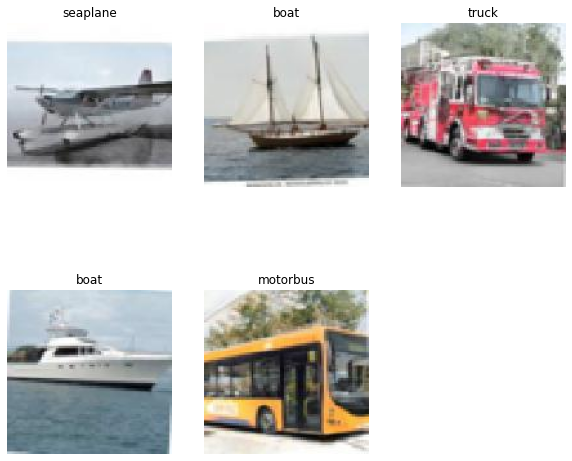

In [6]:
ViewRandomImage(train_ref,5)

In [8]:
size={}
for i in classes:
    images=os.listdir(f"{train_ref}/{i}/")
    for j in images:
        img=plt.imread(f"{train_ref}/{i}/{j}")
        if img.shape not in size:
            size[img.shape]=1
        else:
            size[img.shape]+=1
print(size)

{(128, 128, 3): 3963, (144, 144, 3): 105}


In [9]:
for c in classes:
    images = os.listdir(f"{train_ref}/{c}/")
    for image in images:    
        img = plt.imread(f"{train_ref}/{c}/{image}")
        if img.shape == list(size)[1]:
            img = cv2.resize(img, dsize=(128, 128), interpolation=cv2.INTER_AREA)
            cv2.imwrite(f"{train_ref}/{c}/{image}", img)

In [10]:
size={}
for i in classes:
    images=os.listdir(f"{train_ref}/{i}/")
    for j in images:
        img=plt.imread(f"{train_ref}/{i}/{j}")
        if img.shape not in size:
            size[img.shape]=1
        else:
            size[img.shape]+=1
print(size)

{(128, 128, 3): 4068}


In [11]:
for c in classes:
    images = os.listdir(f"{train_ref}/{c}/")
    for image in images:    
        img = plt.imread(f"{train_ref}/{c}/{image}")
        if len(img.shape)==3:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            cv2.imwrite(f"{train_ref}/{c}/{image}", gray)

In [12]:
x_train=[]
y_train=[]
for i in classes:
    for image in os.listdir(f"{train_ref}/{i}"):
        img=plt.imread(f"{train_ref}/{i}/{image}")
        if img.shape==(128,128):
            img = cv2.resize(img, dsize=(100, 100), interpolation = cv2.INTER_AREA)
            img=img/255
            x_train.append(img)
            y_train.append(f"{i}")
    print(f"{i}")

airplane
bicycle
boat
motorbus
motorcycle
seaplane
train
truck


In [13]:
print(len(x_train),len(y_train))

4068 4068


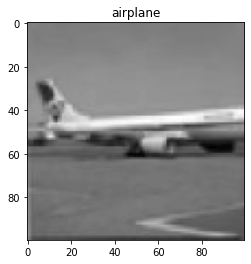

In [15]:
plt.imshow(x_train[0],cmap="gray")
plt.title(y_train[0])
plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train=le.fit_transform(y_train)

In [17]:
y_train

array([0, 0, 0, ..., 7, 7, 7], dtype=int64)

In [18]:
import numpy as np
x_train = (np.array(x_train).reshape(np.array(x_train).shape[0],-1))
y_train = np.array(y_train)
print(x_train.shape,y_train.shape)

(4068, 10000) (4068,)


In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_train,y_train,train_size=0.8,random_state=42)

In [20]:
from sklearn.svm import SVC
model=SVC(kernel="rbf",C=150)
model.fit(X_train,Y_train)

SVC(C=150)

In [21]:
pred=model.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_pred=pred,y_true=Y_test))
print(classification_report(Y_test,pred))

[[109   1  13   0   0   3   1   0]
 [  2  66   0   0   0   0   0   0]
 [ 19   0 113   0   0   0   2   4]
 [  0   0   3  42   7   0   3  15]
 [  0   6   3   6 124   0   0   1]
 [  0   0   0   1   0  77   0   0]
 [  1   1   1   1   4   0  37   3]
 [  2   0   0   7   1   0   4 131]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       127
           1       0.89      0.97      0.93        68
           2       0.85      0.82      0.83       138
           3       0.74      0.60      0.66        70
           4       0.91      0.89      0.90       140
           5       0.96      0.99      0.97        78
           6       0.79      0.77      0.78        48
           7       0.85      0.90      0.88       145

    accuracy                           0.86       814
   macro avg       0.85      0.85      0.85       814
weighted avg       0.86      0.86      0.86       814

